lab9


ASHKAR_8901587

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with

In [15]:
# Load the fMNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Describe data set
print('Shapes')
print('Train Data')
print(f'Images: {x_train.shape}')
print(f'Labels: {y_train.shape}')
print('Test Data')  
print(f'Images: {x_test.shape}')
print(f'Labels: {y_test.shape}')
print('Image Data Range:')
print(f'Min: {x_train.min()}')
print(f'Max: {x_train.max()}')
print('Data types')
print(f'Image DType: {type(x_train)}')
print(f'Image Element DType: {type(x_train[0,0,0])}')
print(f'Label Element DType: {type(y_train[0])}')
# Print no. of classes and  names
no_classes = len(np.unique(y_train))
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(f'Total number of classes: {no_classes}')
print(f'Class names : {class_names}')

Shapes
Train Data
Images: (60000, 28, 28)
Labels: (60000,)
Test Data
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255
Data types
Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
Total number of classes: 10
Class names : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [16]:
# Print the classnames with labels
labels = np.unique(y_train)
for i in range(10):
    print(f"{labels[i]} : {class_names[labels[i]]}")

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle boot


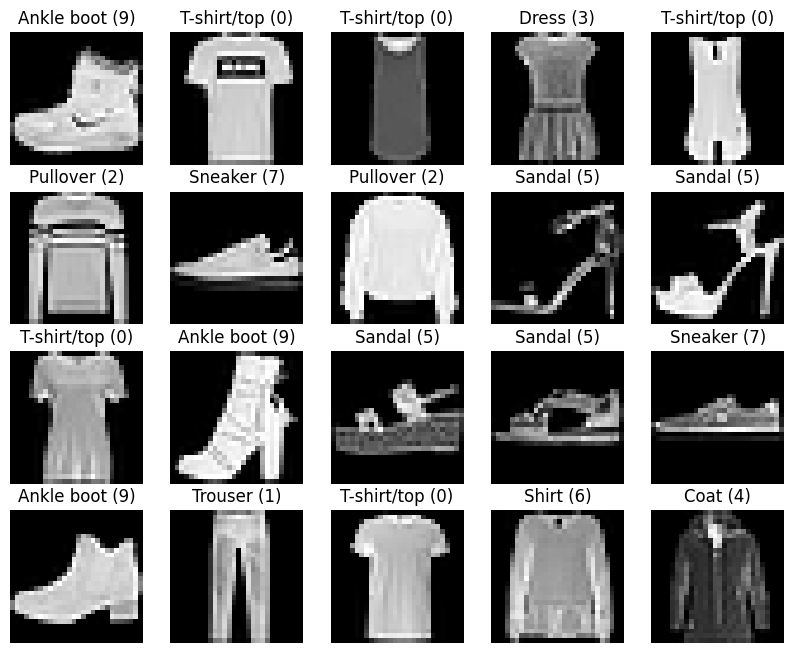

In [17]:
# Plot some sample images 
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f'{class_names[y_train[i]]} ({y_train[i]})' )
    plt.axis("off")
plt.show()

Train a dense neural network using Keras

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten images into 1-d array
train_images = x_train.reshape((60000, 28 * 28))
test_images = x_test.reshape((10000, 28 * 28))

# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255
# Build the model
model = Sequential([
    Dense(128, activation='relu'),
     Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(train_images, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 0.5510 - accuracy: 0.8090
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4115 - accuracy: 0.8560
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3665 - accuracy: 0.8690
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3413 - accuracy: 0.8779
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3203 - accuracy: 0.8838
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3040 - accuracy: 0.8895
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2950 - accuracy: 0.8928
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2800 - accuracy: 0.8975
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2705 - accuracy: 0.9000
Epoch 10/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2620 - accuracy: 0.9

In [19]:
# Find test loss and test accuracy
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print("Test accuracy: ", test_accuracy)
print("Test Loss : ", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8806
Test accuracy:  0.8805999755859375
Test Loss :  0.33874842524528503


313/313 [==============================] - 1s 2ms/step


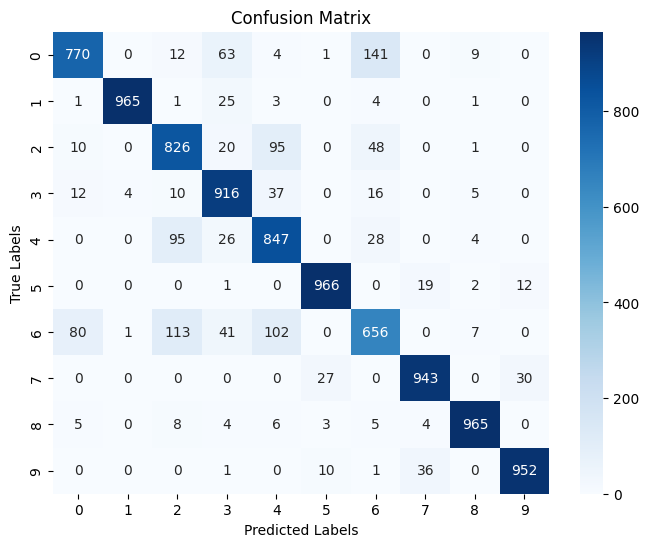

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the labels 
prediction = model.predict(test_images)
predicted_labels = np.argmax(prediction, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Visualize the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Precision : 0.8815326838495524
Recall : 0.8806
F1 Score :  0.8800670738275675


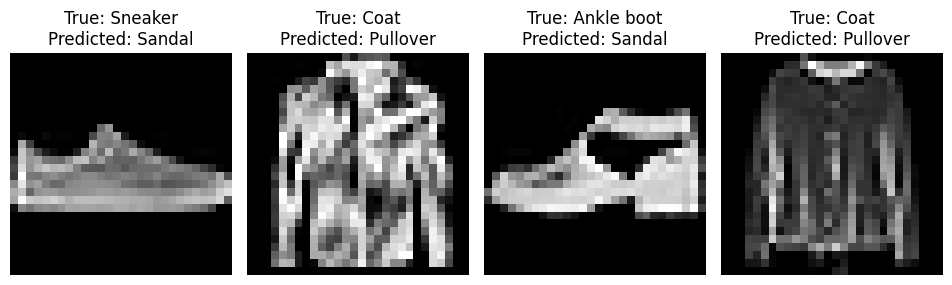

In [21]:
precision = precision_score(y_test, predicted_labels , average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1score = f1_score(y_test, predicted_labels, average='weighted')

print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1 Score :  {f1score}')
# Find incorrect classifications indices
wrong_indices = np.where(predicted_labels != y_test)[0]

# Plot some incorrect classifications
plt.figure(figsize=(12, 6))
for i, idx in enumerate(wrong_indices[:4]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28,28), cmap="gray")
    plt.title(f"True: {class_names[y_test[idx]]}\nPredicted: {class_names[predicted_labels[idx]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


The model performs well but faces challenges in distinguishing visually similar classes like sneaker and sandal, pullover and coat, Ankle boot and sandal, and shirt and t-shirt/top, which could be improved with more example photos for accurate image classification.